<a href="https://colab.research.google.com/github/Ayukhoirunnisa/Belajar/blob/main/Python_EDA_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: [Louis Owen](https://louisowen6.github.io/)

1. Make a copy of this notebook
2. Download the [dataset](https://www.kaggle.com/adegladius/well-cleaned-datasets-train-test-using-excel?select=Titanic_train.csv)
3. Upload the dataset to your Google Drive (put it in the same folder with the notebook)

# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Public Speaker/Dibimbing/Python EDA I

# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import Data

In [ ]:
df = pd.read_csv('Titanic_train.csv',encoding ='latin')

# Initial EDA

In [ ]:
# Display the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Ticket_A5,Ticket_PC,Ticket_STONO2,Ticket_xxx,Ticket_PP,Ticket_CA,Ticket_SCParis,Ticket_SCA4,Ticket_A4,Ticket_SOC,Ticket_WC,Ticket_SOTONOQ,Ticket_WEP,Ticket_STONO,Ticket_C,Ticket_LINE,Ticket_FCC,Ticket_SWPP,Ticket_PPP,Ticket_SC,Ticket_SCAH,Ticket_SOPP,Ticket_FC,Ticket_SOTONO2
0,1,0,3,7.2500,26,2,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,71.2833,37,2,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,7.9250,22,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,53.1000,37,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,8.0500,26,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Display the last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Ticket_A5,Ticket_PC,Ticket_STONO2,Ticket_xxx,Ticket_PP,Ticket_CA,Ticket_SCParis,Ticket_SCA4,Ticket_A4,Ticket_SOC,Ticket_WC,Ticket_SOTONOQ,Ticket_WEP,Ticket_STONO,Ticket_C,Ticket_LINE,Ticket_FCC,Ticket_SWPP,Ticket_PPP,Ticket_SC,Ticket_SCAH,Ticket_SOPP,Ticket_FC,Ticket_SOTONO2
886,887,0,2,13.00,31,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,888,1,1,30.00,37,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,889,0,3,23.45,22,4,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
889,890,1,1,30.00,41,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
890,891,0,3,7.75,26,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Display 5 random rows
df.sample(5)

,PassengerId,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Ticket_A5,Ticket_PC,Ticket_STONO2,Ticket_xxx,Ticket_PP,Ticket_CA,Ticket_SCParis,Ticket_SCA4,Ticket_A4,Ticket_SOC,Ticket_WC,Ticket_SOTONOQ,Ticket_WEP,Ticket_STONO,Ticket_C,Ticket_LINE,Ticket_FCC,Ticket_SWPP,Ticket_PPP,Ticket_SC,Ticket_SCAH,Ticket_SOPP,Ticket_FC,Ticket_SOTONO2
151,152,1,1,66.6000,37,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
519,520,0,3,7.8958,26,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
617,618,0,3,16.1000,22,2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
333,334,0,3,18.0000,26,3,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
784,785,0,3,7.0500,26,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- There are 891 rows of data with 46 columns
- The target variable is `Survived` and possible dropped column is `PassengerId`
- Data has only float and integer values.
- No column has null/missing values.

In [ ]:
# Get the dataframe's info 
# (number of rows, column name & type, number of missing rows per column, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Fare_1           891 non-null    float64
 4   Age_1            891 non-null    int64  
 5   Family           891 non-null    int64  
 6   Sex_1            891 non-null    int64  
 7   IsAlone          891 non-null    int64  
 8   Title_Mr         891 non-null    int64  
 9   Title_Mrs        891 non-null    int64  
 10  Title_Miss       891 non-null    int64  
 11  Title_Master     891 non-null    int64  
 12  Embarked_S       891 non-null    int64  
 13  Embarked_C       891 non-null    int64  
 14  Cabin_M          891 non-null    int64  
 15  Cabin_C          891 non-null    int64  
 16  Cabin_E          891 non-null    int64  
 17  Cabin_G         

- Only 39% passengers are survived (still considered as balanced class)
- Around 65% of the passengers are male (how I know 1 refers to male is by looking through the mean of `Title_Mr` column)
- There are extreme values on `Fare_1` column that can be seen from the mean value is greater than the median value & the maximum value is far greater than the 75% percentile value.

In [ ]:
# Method to get summary statistics for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Ticket_A5,Ticket_PC,Ticket_STONO2,Ticket_xxx,Ticket_PP,Ticket_CA,Ticket_SCParis,Ticket_SCA4,Ticket_A4,Ticket_SOC,Ticket_WC,Ticket_SOTONOQ,Ticket_WEP,Ticket_STONO,Ticket_C,Ticket_LINE,Ticket_FCC,Ticket_SWPP,Ticket_PPP,Ticket_SC,Ticket_SCAH,Ticket_SOPP,Ticket_FC,Ticket_SOTONO2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0
mean,446.000000,0.383838,2.308642,32.204208,29.259259,1.904602,0.647587,0.602694,0.580247,0.141414,0.207632,0.044893,0.725028,0.188552,0.771044,0.066218,0.035915,0.004489,0.037037,0.016835,0.052750,0.014590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,257.353842,0.486592,0.836071,49.693429,6.220581,1.613459,0.477990,0.489615,0.493796,0.348644,0.405840,0.207186,0.446751,0.391372,0.420397,0.248802,0.186182,0.066890,0.188959,0.128725,0.223659,0.119973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,223.500000,0.000000,2.000000,7.910400,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,446.000000,0.000000,3.000000,14.454200,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,668.500000,1.000000,3.000000,31.000000,31.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,891.000000,1.000000,3.000000,512.329200,41.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- There are 3 unique values of `PClass`: 1,2,3
- All `Ticket_*` columns only has 0 as their unique values, we should just drop these columns

In [ ]:
# Getting unique values for each of the column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*10)

Column: PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 24

# Dropping Columns

In [ ]:
df = df.drop(columns = ['PassengerId'] + [x for x in df.columns if 'Ticket' in x])

In [ ]:
df

,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F
0,0,3,7.2500,26,2,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,1,1,71.2833,37,2,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,1,3,7.9250,22,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0
3,1,1,53.1000,37,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
4,0,3,8.0500,26,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,13.0000,31,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
887,1,1,30.0000,37,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
888,0,3,23.4500,22,4,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
889,1,1,30.0000,41,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0


# Target Feature Analysis

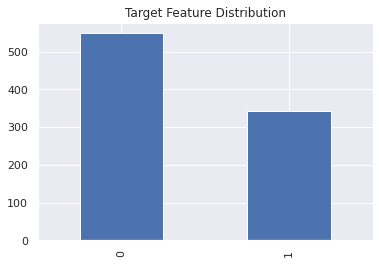

In [ ]:
df['Survived'].value_counts().plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

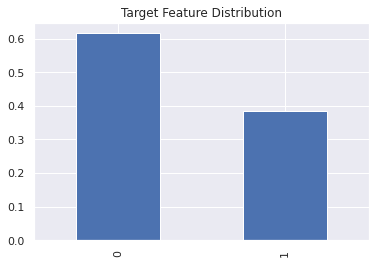

In [ ]:
df['Survived'].value_counts(True).plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

40:60 distribution is still considered as balanced distribution

# Correlation Analysis

In [ ]:
# Method to calculate the correlation matrix for all of the numerical columns
# default is pearson correlation
df_corr = df.corr()
df_corr

,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F
Survived,1.000000,-0.338481,0.257307,0.158999,0.016639,-0.543351,-0.203367,-0.549199,0.341994,0.335636,0.085221,-0.149683,0.168240,-0.316912,0.114652,0.145321,0.016040,0.150716,0.022287,0.175095,0.057935
Pclass,-0.338481,1.000000,-0.549500,-0.936817,0.065997,0.131900,0.135207,0.142698,-0.153758,-0.010261,0.082081,0.074053,-0.243292,0.725541,-0.417048,-0.230091,0.055561,-0.278690,-0.204934,-0.369572,0.011063
Fare_1,0.257307,-0.549500,1.000000,0.517169,0.217138,-0.182333,-0.271832,-0.183766,0.107259,0.119518,0.010908,-0.162184,0.269335,-0.482075,0.364318,0.053717,-0.025180,0.098878,0.019549,0.386297,-0.033093
Age_1,0.158999,-0.936817,0.517169,1.000000,-0.122021,0.184940,-0.036604,0.137158,-0.033503,-0.199373,-0.035195,-0.068927,0.240195,-0.716282,0.424484,0.223818,-0.078410,0.263297,0.241504,0.358422,-0.033680
Family,0.016639,0.065997,0.217138,-0.122021,1.000000,-0.200988,-0.690922,-0.338014,0.153842,0.107500,0.372472,0.077359,-0.046215,0.009175,0.035347,-0.033466,0.035206,-0.021566,-0.051767,0.004620,0.013003
Sex_1,-0.543351,0.131900,-0.182333,0.184940,-0.200988,1.000000,0.303646,0.867334,-0.550146,-0.693916,0.159934,0.119224,-0.082853,0.140391,-0.058649,-0.047003,-0.091031,-0.079248,0.078271,-0.109689,-0.008202
IsAlone,-0.203367,0.135207,-0.271832,-0.036604,-0.690922,0.303646,1.000000,0.396920,-0.361624,-0.048054,-0.267024,0.029074,-0.095298,0.158029,-0.125062,-0.028179,-0.082709,-0.083664,0.052762,-0.064914,-0.015972
Title_Mr,-0.549199,0.142698,-0.183766,0.137158,-0.338014,0.867334,0.396920,1.000000,-0.477160,-0.601857,-0.254903,0.112870,-0.072567,0.137319,-0.047873,-0.031384,-0.078955,-0.049952,0.040591,-0.114673,-0.048235
Title_Mrs,0.341994,-0.153758,0.107259,-0.033503,0.153842,-0.550146,-0.361624,-0.477160,1.000000,-0.207749,-0.087987,-0.002550,0.067872,-0.123817,0.073270,0.042837,0.069107,0.073907,-0.053107,0.062731,0.004341
Title_Miss,0.335636,-0.010261,0.119518,-0.199373,0.107500,-0.693916,-0.048054,-0.601857,-0.207749,1.000000,-0.110981,-0.137144,0.036204,-0.043749,0.008343,0.020161,0.048405,0.016822,-0.066985,0.064880,0.006941


In [ ]:
# We can also calculate the correlation using spearman method (non linear)
df_corr_spearman = df.corr(method='spearman')
df_corr_spearman

,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F
Survived,1.000000,-0.339668,0.323736,0.170998,0.165463,-0.543351,-0.203367,-0.549199,0.341994,0.335636,0.085221,-0.149683,0.168240,-0.316912,0.114652,0.145321,0.016040,0.150716,0.022287,0.175095,0.057935
Pclass,-0.339668,1.000000,-0.688032,-0.932742,-0.075698,0.135775,0.135896,0.149116,-0.163531,-0.007323,0.078456,0.049011,-0.220995,0.683291,-0.388343,-0.218594,0.058033,-0.265456,-0.190829,-0.344135,-0.004044
Fare_1,0.323736,-0.688032,1.000000,0.582434,0.528907,-0.259593,-0.531472,-0.331099,0.251583,0.081418,0.136656,-0.032712,0.204104,-0.539300,0.349118,0.147312,-0.007573,0.200382,0.107813,0.280225,-0.021403
Age_1,0.170998,-0.932742,0.582434,1.000000,-0.032071,0.203073,-0.024547,0.149215,-0.004855,-0.244256,-0.018590,0.000309,0.188305,-0.622294,0.359623,0.200233,-0.101088,0.238093,0.198985,0.306683,0.005677
Family,0.165463,-0.075698,0.528907,-0.032071,1.000000,-0.292035,-0.963624,-0.413252,0.313879,0.076535,0.336373,0.006667,0.051652,-0.109296,0.098388,0.006092,0.080331,0.043738,-0.056936,0.050812,0.029500
Sex_1,-0.543351,0.135775,-0.259593,0.203073,-0.292035,1.000000,0.303646,0.867334,-0.550146,-0.693916,0.159934,0.119224,-0.082853,0.140391,-0.058649,-0.047003,-0.091031,-0.079248,0.078271,-0.109689,-0.008202
IsAlone,-0.203367,0.135896,-0.531472,-0.024547,-0.963624,0.303646,1.000000,0.396920,-0.361624,-0.048054,-0.267024,0.029074,-0.095298,0.158029,-0.125062,-0.028179,-0.082709,-0.083664,0.052762,-0.064914,-0.015972
Title_Mr,-0.549199,0.149116,-0.331099,0.149215,-0.413252,0.867334,0.396920,1.000000,-0.477160,-0.601857,-0.254903,0.112870,-0.072567,0.137319,-0.047873,-0.031384,-0.078955,-0.049952,0.040591,-0.114673,-0.048235
Title_Mrs,0.341994,-0.163531,0.251583,-0.004855,0.313879,-0.550146,-0.361624,-0.477160,1.000000,-0.207749,-0.087987,-0.002550,0.067872,-0.123817,0.073270,0.042837,0.069107,0.073907,-0.053107,0.062731,0.004341
Title_Miss,0.335636,-0.007323,0.081418,-0.244256,0.076535,-0.693916,-0.048054,-0.601857,-0.207749,1.000000,-0.110981,-0.137144,0.036204,-0.043749,0.008343,0.020161,0.048405,0.016822,-0.066985,0.064880,0.006941


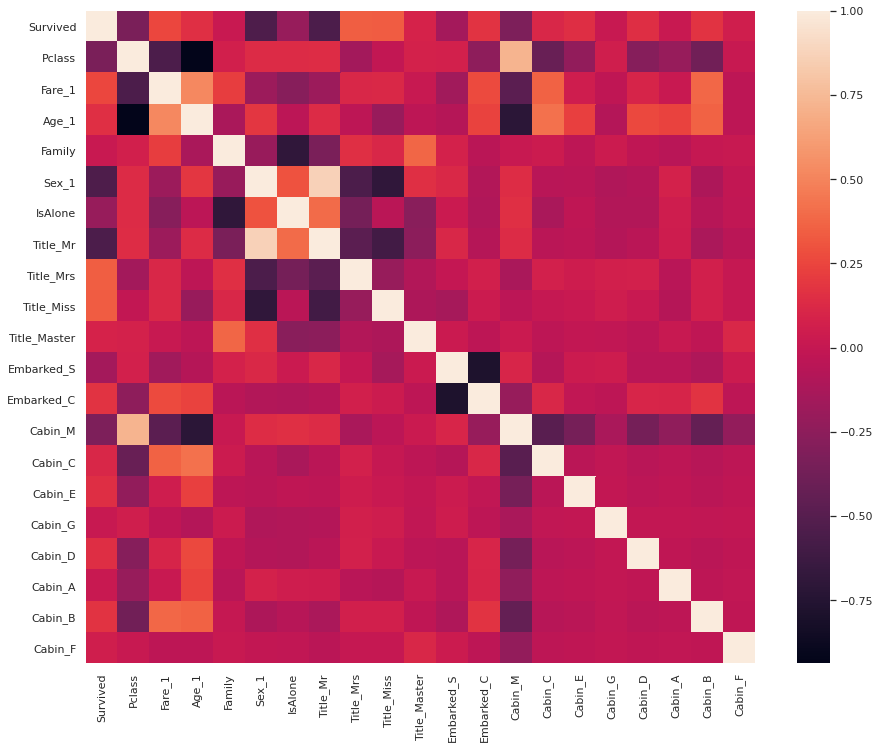

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr)

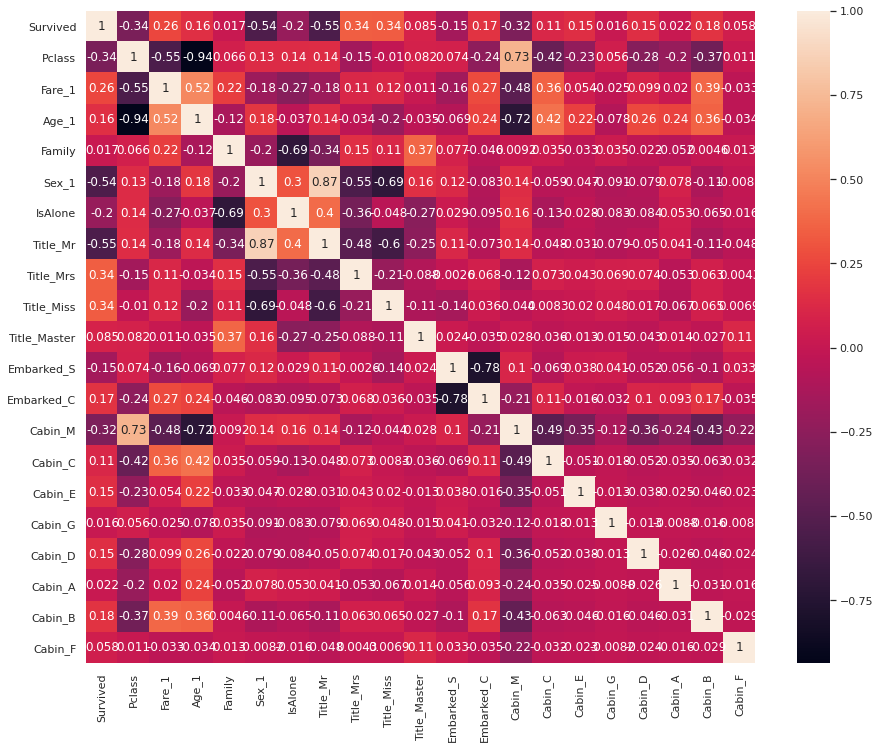

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr, annot=True)

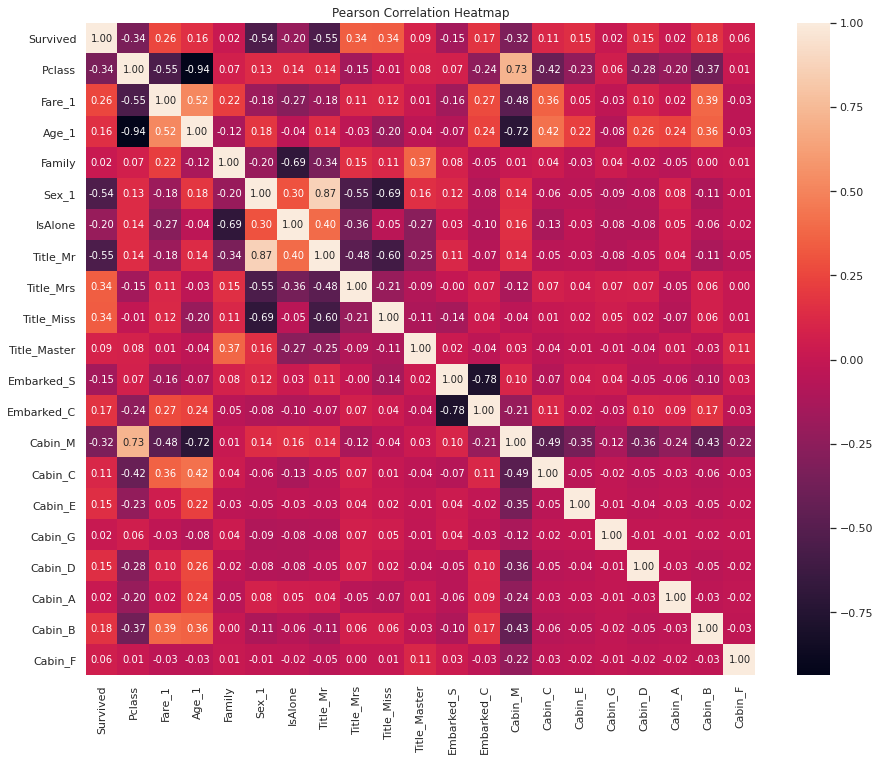

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr, annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

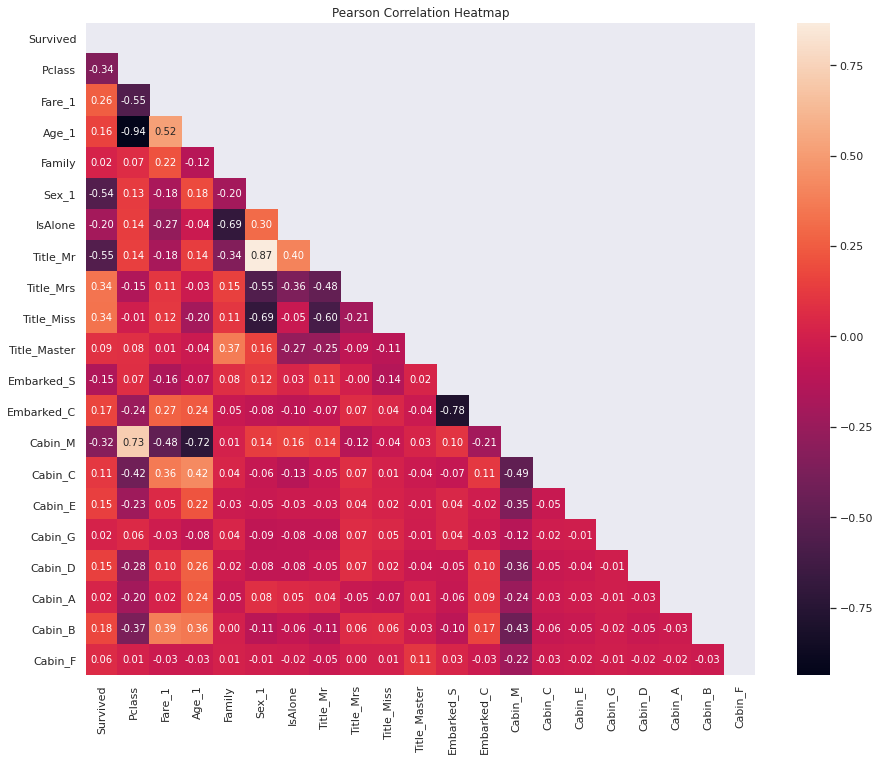

In [ ]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

For more settings, you can refer to the [official documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of Seaborn

- `Sex_1` and `Title_Mr` are good candidates of predictors
- However, they have a very high correlation (0.87) which means we have to choose which one of them will be used as predictor
- `Family` and `isAlone` have a quite high negative correlation (-0.69), which makes sense because Family==1 equals to isAlone==1
- `Embarked_C` and `Embarked_S` also have a high negative correlation (-0.78)
- `Age_1` and `Cabin_M` is another pair that has high negative correlation (-0.72). This is interesting, because the older the passengers the more likely they will not be placed at `Cabin_M`.

# Fare Outlier Analysis

From the initial EDA, we knew that the `Fare_1` column is highly possible to contain extreme values/outliers. Now, we want to make sure our hypothesis via boxplot. 

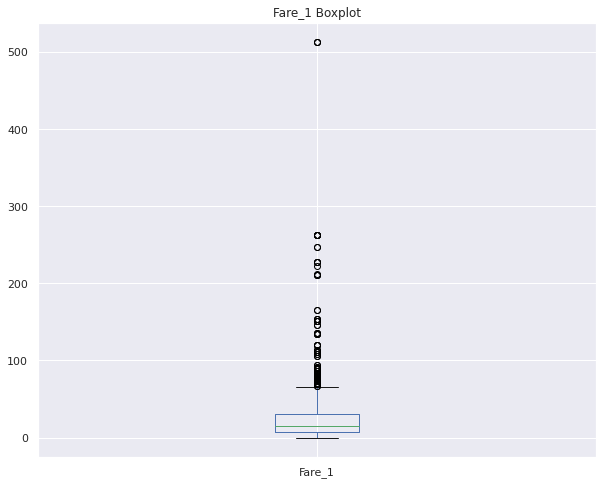

In [ ]:
df['Fare_1'].plot(kind='box',figsize=(10,8))
plt.title("Fare_1 Boxplot")
plt.show()

Based on the default settings of pandas boxplot (1.5 * IQR), we can see that there are some samples that considered as outliers.  

We want to compare the characteristics of passengers that are considered as upper outliers and not.

In [ ]:
IQR = df['Fare_1'].quantile(.75) - df['Fare_1'].quantile(.25)
df_upper_outliers = df[df['Fare_1'] > 1.5 * IQR + df['Fare_1'].quantile(.75)]
df_normal = df[df['Fare_1'] <= 1.5 * IQR + df['Fare_1'].quantile(.75)]

In [ ]:
df_upper_outliers.describe()

,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F
count,116.000000,116.000000,116.000000,116.00000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0,116.000000,116.000000,116.000000,116.0
mean,0.681034,1.163793,128.291629,37.25000,2.750000,0.396552,0.293103,0.336207,0.250000,0.344828,0.034483,0.534483,0.448276,0.224138,0.318966,0.051724,0.0,0.129310,0.008621,0.267241,0.0
std,0.468098,0.509799,84.636908,4.09002,2.409673,0.491304,0.457160,0.474460,0.434891,0.477374,0.183257,0.500974,0.499475,0.418823,0.468098,0.222430,0.0,0.336999,0.092848,0.444439,0.0
min,0.000000,1.000000,66.600000,22.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,78.189600,37.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,90.000000,37.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,147.778100,41.00000,3.000000,1.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,1.000000,3.000000,512.329200,41.00000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [ ]:
df_normal.describe()

,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F
count,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.339355,2.48000,17.822091,28.063226,1.778065,0.685161,0.649032,0.616774,0.125161,0.187097,0.046452,0.753548,0.149677,0.852903,0.028387,0.033548,0.005161,0.023226,0.018065,0.020645,0.016774
std,0.473796,0.73439,13.578085,5.568449,1.416873,0.464752,0.477581,0.486487,0.331115,0.390241,0.210597,0.431223,0.356985,0.354431,0.166183,0.180180,0.071703,0.150717,0.133271,0.142285,0.128507
min,0.000000,1.00000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,7.895800,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.00000,13.000000,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.00000,26.000000,31.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.00000,65.000000,41.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Mean `Survived`: 0.68 vs 0.34
- Mean `Fare_1`    : 128.3 vs 17.8
- Mean `Age_1`     : 37.25 vs 28.06
- Mean `Sex_1`     : 0.39 vs 0.69
- Mean `Cabin_M`   : 0.22 vs 0.85 

It is clear that samples that are considered as outliers based on the `Fare_1` column have very different data distribution with samples that are considered as normal. So, we clearly **can't drop these outliers**.

# Cabin Effect Analysis

In [ ]:
df_cabin_analysis = df.copy()
df_cabin_analysis['cabin'] = df_cabin_analysis.apply(lambda x: 'A' if x['Cabin_A']==1 else
                                                    'B' if x['Cabin_B']==1 else
                                                    'C' if x['Cabin_C']==1 else
                                                    'D' if x['Cabin_D']==1 else
                                                    'E' if x['Cabin_E']==1 else
                                                    'F' if x['Cabin_F']==1 else
                                                    'G' if x['Cabin_G']==1 else
                                                    'M' if x['Cabin_M']==1 else
                                                    'Others'
                                        ,axis=1)

In [ ]:
df_cabin_analysis

,Survived,Pclass,Fare_1,Age_1,Family,Sex_1,IsAlone,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Embarked_S,Embarked_C,Cabin_M,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,cabin
0,0,3,7.2500,26,2,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,M
1,1,1,71.2833,37,2,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,C
2,1,3,7.9250,22,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,M
3,1,1,53.1000,37,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,C
4,0,3,8.0500,26,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,13.0000,31,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,M
887,1,1,30.0000,37,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,B
888,0,3,23.4500,22,4,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,M
889,1,1,30.0000,41,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,C


In [ ]:
df_cabin_analysis.groupby(['cabin'])[['Survived']].agg({'count','mean'})

Survived      
            mean count
cabin                 
A       0.466667    15
B       0.744681    47
C       0.593220    59
D       0.757576    33
E       0.750000    32
F       0.615385    13
G       0.500000     4
M       0.299854   687
Others  0.000000     1

It can be seen that `Cabin_*` can also be good predictors since they have quite different distribution as well.

# Pclass Analysis

In [ ]:
df.groupby(['Pclass'])[['Survived']].agg({'count','mean'})

Survived      
            mean count
Pclass                
1       0.629630   216
2       0.472826   184
3       0.242363   491

It is make sense that passengers with First class are more likely to survived compared to passengers in third class, since they were closer to the lifeboats.

# Sex & Family & Pclass Analysis

In [ ]:
df.groupby(['Sex_1'])[['Survived']].agg({'count','mean'})

Survived      
           mean count
Sex_1                
0      0.742038   314
1      0.188908   577

Looking just through the sex of the passengers, it can be seen that women are more likely to survived compared to men.

However, maybe it because those men were trying to save their couple / family first. Let's validate our hypothesis through below analysis.

In [ ]:
df.groupby(['Sex_1','Family'])[['Survived']].agg({'count','mean'})

Survived      
                  mean count
Sex_1 Family                
0     1       0.785714   126
      2       0.816092    87
      3       0.775510    49
      4       0.842105    19
      5       0.250000    12
      6       0.375000     8
      7       0.375000     8
      8       0.000000     2
      11      0.000000     3
1     1       0.155718   411
      2       0.243243    74
      3       0.396226    53
      4       0.500000    10
      5       0.000000     3
      6       0.000000    14
      7       0.250000     4
      8       0.000000     4
      11      0.000000     4

Turns out only 15% of the male individual passengers survived the incident.

In [ ]:
df.groupby(['Pclass','Sex_1'])[['Survived']].agg({'count','mean'})

Survived      
                  mean count
Pclass Sex_1                
1      0      0.968085    94
       1      0.368852   122
2      0      0.921053    76
       1      0.157407   108
3      0      0.500000   144
       1      0.135447   347

Across Pclass, women passengers are consistently more likely to survived compared to men.

So, maybe the reason why women are more likely to survived is because during the evacuation women are prioritized than men. And yes, turns out it is true based on the Wikipedia!
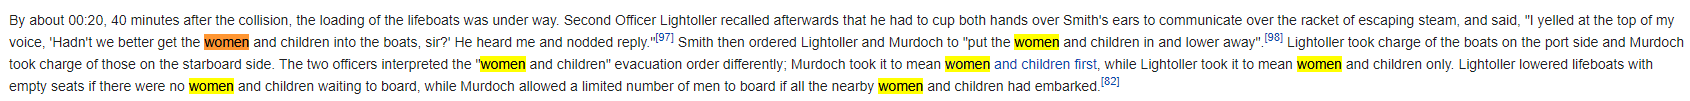

# Closing Statement

Again, I want to stress that **you can't know everything**!


If you found any issue or forget some of the syntax, it is okay and acceptable. You can just search anything on Google and Stack Overflow. 


The important thing is you have to know what are the things you want to search!